In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [49]:
file_path = 'Age_Prediction.csv'  
try:
    df = pd.read_csv(file_path)
    print("dataset loaded")
except FileNotFoundError:
    print("error:file not found")

dataset loaded


In [50]:
class MLModel:
    def __init__(self, model_type='ridge'):
        self.model_type = model_type
        self.scaler = StandardScaler()
        
        if model_type == 'ridge':
            self.model = Ridge(alpha=1.0)
        elif model_type == 'xgboost':
            self.model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
        elif model_type == 'RandomForestRegressor':
            self.model = RandomForestRegressor(random_state=42)
        else:
            raise ValueError("Unsupported model type")
        
    def preprocess(self, X_train, X_test):
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        return X_train_scaled, X_test_scaled
    
    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)
    
    def predict(self, X_test):
        return self.model.predict(X_test)
    
    def evaluate(self, y_test, y_pred):
        return mean_squared_error(y_test, y_pred, squared=False)

In [51]:
print(df.head())

      ID Age_group  Age  Gender  PAQ605  Body Mass Index  \
0  73564     Adult   61       2       2             35.7   
1  73568     Adult   26       2       2             20.3   
2  73576     Adult   16       1       2             23.2   
3  73577     Adult   32       1       2             28.9   
4  73580     Adult   38       2       1             35.9   

   Blood Glucose after fasting  Diabetic or not  Respondent's Oral  \
0                          110                2                150   
1                           89                2                 80   
2                           89                2                 68   
3                          104                2                 84   
4                          103                2                 81   

   Blood Insulin Levels  
0                 14.91  
1                  3.85  
2                  6.14  
3                 16.15  
4                 10.92  


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           2278 non-null   int64  
 1   Age_group                    2278 non-null   object 
 2   Age                          2278 non-null   int64  
 3   Gender                       2278 non-null   int64  
 4   PAQ605                       2278 non-null   int64  
 5   Body Mass Index              2278 non-null   float64
 6   Blood Glucose after fasting  2278 non-null   int64  
 7   Diabetic or not              2278 non-null   int64  
 8   Respondent's Oral            2278 non-null   int64  
 9   Blood Insulin Levels         2278 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 178.1+ KB


In [53]:
print("\nmissing values:")
print(df.isnull().sum())


missing values:
ID                             0
Age_group                      0
Age                            0
Gender                         0
PAQ605                         0
Body Mass Index                0
Blood Glucose after fasting    0
Diabetic or not                0
Respondent's Oral              0
Blood Insulin Levels           0
dtype: int64


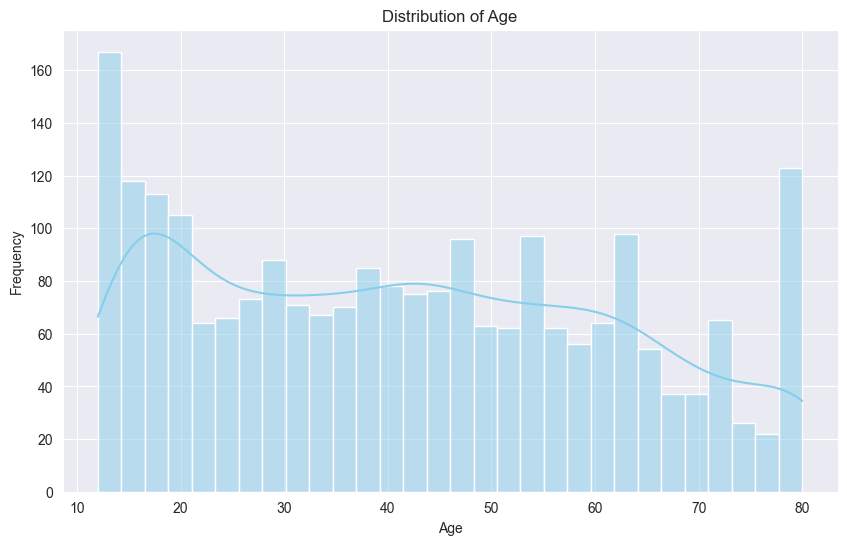

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

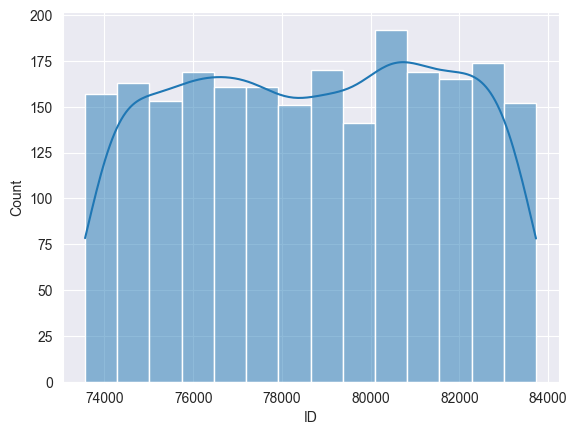

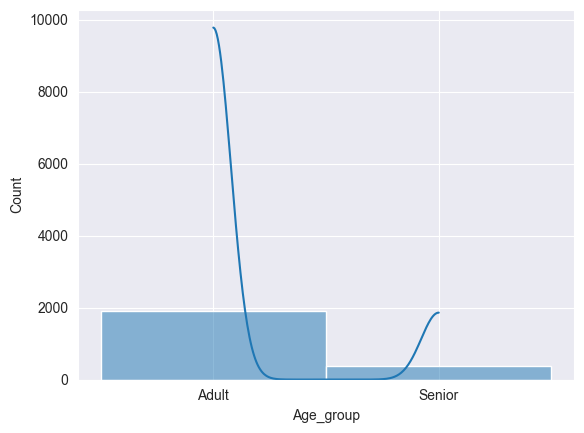

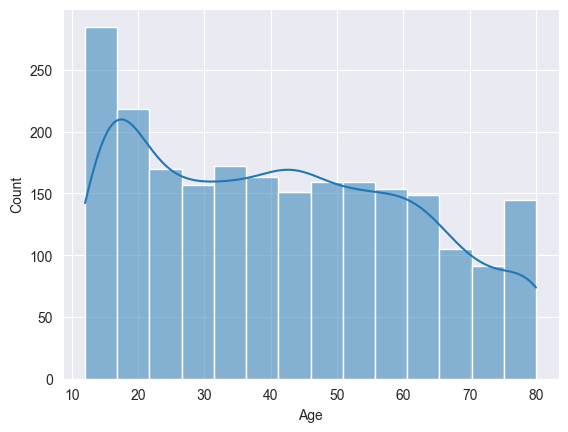

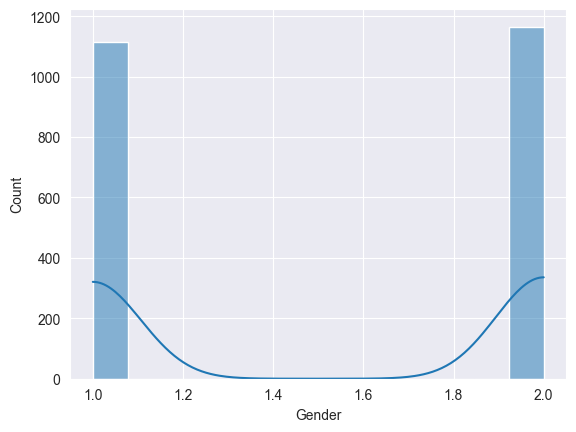

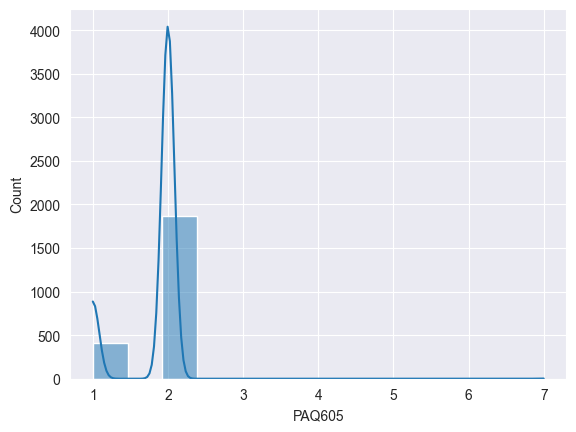

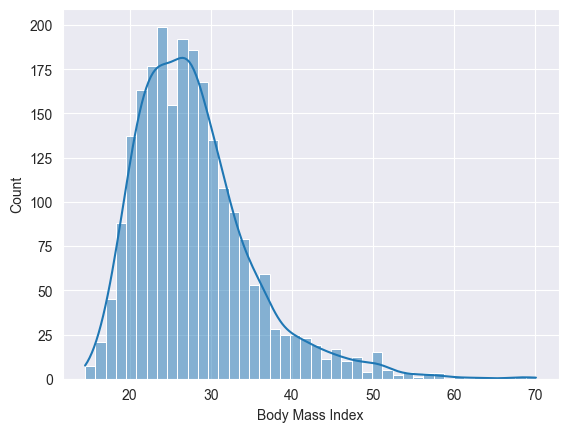

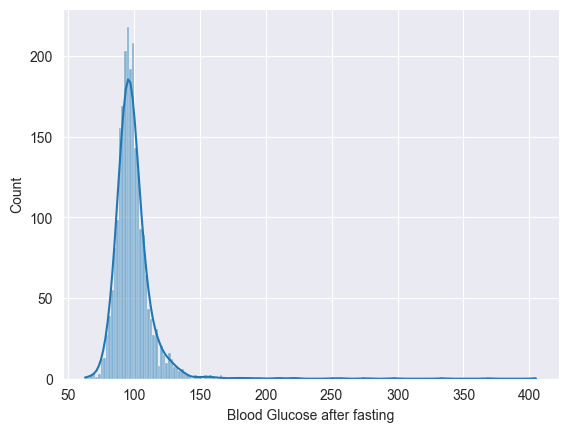

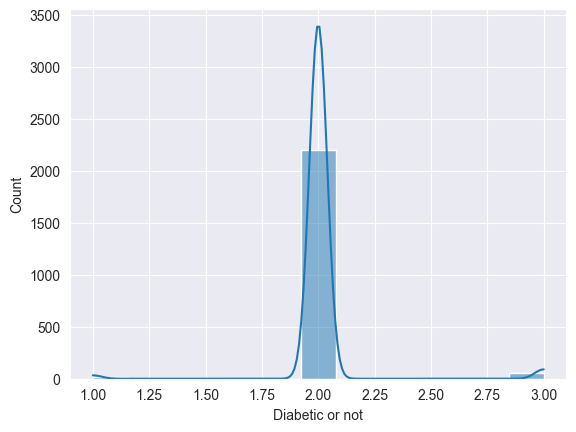

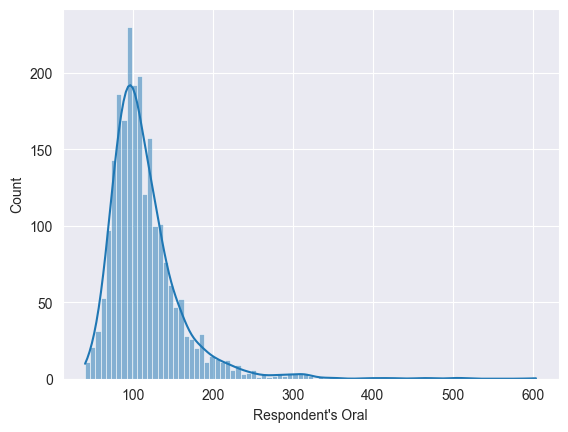

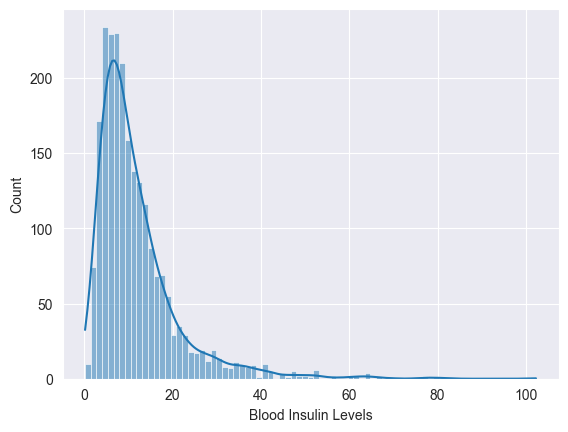

In [55]:
for col in df:
    sns.histplot(x=col,data=df,kde=True)
    plt.show()

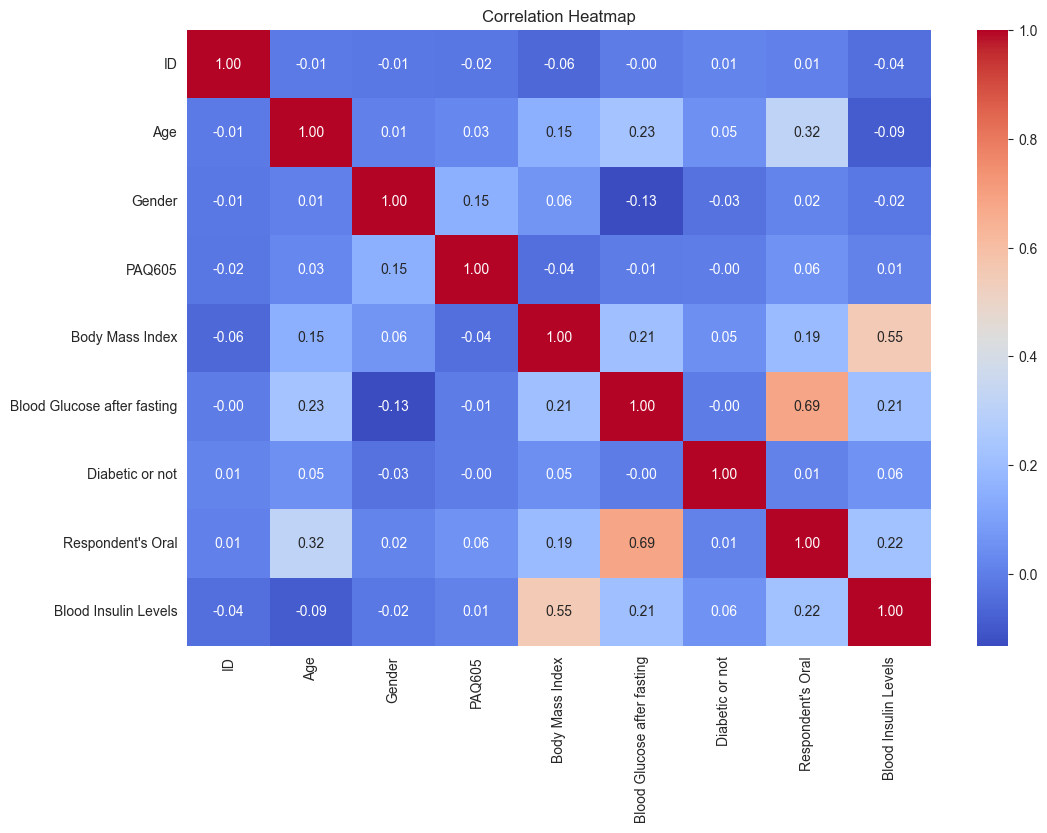

In [56]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [57]:
df = pd.get_dummies(df, drop_first=True)

In [58]:
X = df.drop("Age", axis=1)
y = df["Age"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
rfr_model = MLModel(model_type='ridge')
X_train_scaled, X_test_scaled = rfr_model.preprocess(X_train, X_test)
rfr_model.train(X_train_scaled, y_train)
y_pred_ridge = rfr_model.predict(X_test_scaled)
rfr_rmse = rfr_model.evaluate(y_test, y_pred_ridge)
print(f'Ridge RMSE: {rfr_rmse:.4f}')

Ridge RMSE: 13.6316


In [60]:
ridge_model = MLModel(model_type='ridge')
X_train_scaled, X_test_scaled = ridge_model.preprocess(X_train, X_test)
ridge_model.train(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
ridge_rmse = ridge_model.evaluate(y_test, y_pred_ridge)
print(f'Ridge RMSE: {ridge_rmse:.4f}')

Ridge RMSE: 13.6316


In [61]:
xgb_model = MLModel(model_type='xgboost')
xgb_model.train(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_rmse = xgb_model.evaluate(y_test, y_pred_xgb)
print(f'XGBoost RMSE: {xgb_rmse:.4f}')


XGBoost RMSE: 13.0300


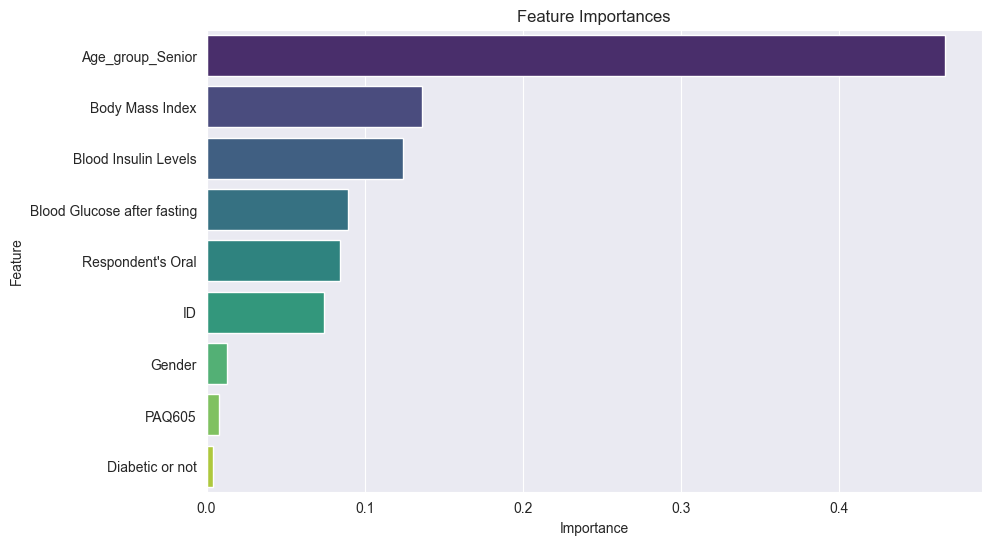

In [62]:
model.fit(X_train, y_train)
feature_importances = pd.DataFrame({
    'Feature': df.drop("Age", axis=1).columns,
    'Importance': model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")
plt.title("Feature Importances")
plt.show()

In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
def predict_age(input_data):
    input_df = pd.DataFrame([input_data])
    input_df = pd.get_dummies(input_df, drop_first=True)
    
    missing_cols = set(X.columns) - set(input_df.columns)
    for col in missing_cols:
        input_df[col] = 0
    

    input_df = input_df[X.columns]
    

    input_scaled = scaler.transform(input_df)
    

    predicted_age = rfr_model.predict(input_scaled)
    
    return predicted_age[0]


input_data = { 
    'Gender': 1,  
    'PAQ605': 2,  
    'Body mass index':24.6,
    'Blood Glucose after fasting':100,
    'Diabetic or not':2,
    "Respondent's Oral":97,
    'Blood Insulin Level':4.33
}

predicted_age = predict_age(input_data)
print(f"Przewidywany wiek: {predicted_age}")


Przewidywany wiek: 29.71677035638323
